**Project 4: Social Media Usage & Stress**


Noelani Ching

3 Questions that can be answered:

-- Has social media search interest increased over time, and how does stress search interest compare across the same period?

-- Do increases in social media interest correlate with increases in stress-related searches?

-- Are there predictable seasonal patterns?

In [1]:
%pip install pytrends pandas matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pytrends]1/3 [seaborn]
Note: you may need to restart the kernel to use updated packages.


In [18]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

plt.style.use("ggplot")
pytrends = TrendReq()

# Data 1: Social media interest
pytrends.build_payload(["social media use"], timeframe="2015-01-01 2025-01-01")
social = pytrends.interest_over_time()

# Data 2: Stress symptoms interest
pytrends.build_payload(["stress symptoms"], timeframe="2015-01-01 2025-01-01")
stress = pytrends.interest_over_time()

social.head(), stress.head()

(            social media use  isPartial
 date                                   
 2015-01-01                26      False
 2015-02-01                30      False
 2015-03-01                32      False
 2015-04-01                32      False
 2015-05-01                28      False,
             stress symptoms  isPartial
 date                                  
 2015-01-01               81      False
 2015-02-01               89      False
 2015-03-01              100      False
 2015-04-01               88      False
 2015-05-01               83      False)

In [ ]:

df = social.join(stress.drop(columns=["isPartial"]), how="inner")
df = df.drop(columns=["isPartial"], errors="ignore")  
df = df.dropna()                                      

df['social_smooth'] = df['social media use'].rolling(3).mean()
df['stress_smooth'] = df['stress symptoms'].rolling(3).mean()

df.head()
# TechnicallyRipped on youtube for the drop columns

,social media use,stress symptoms,social_smooth,stress_smooth
date,,,,
2015-01-01,26,81,NaN,NaN
2015-02-01,30,89,NaN,NaN
2015-03-01,32,100,29.333333,90.000000
2015-04-01,32,88,31.333333,92.333333
2015-05-01,28,83,30.666667,90.333333


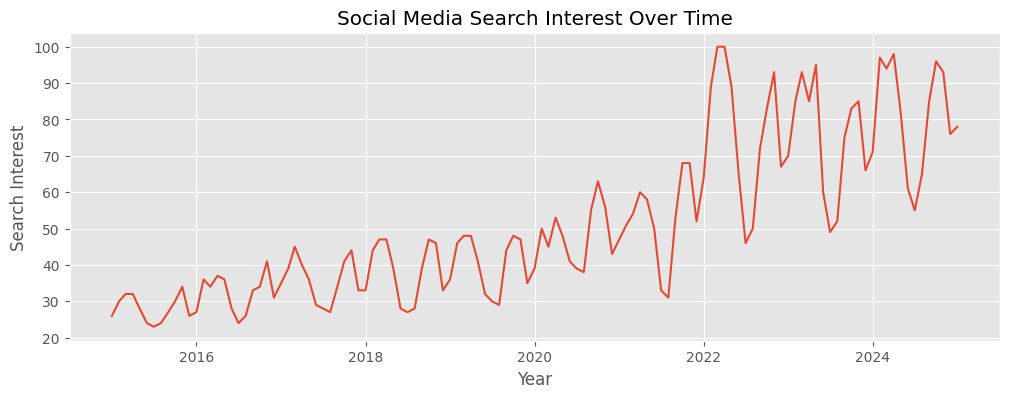

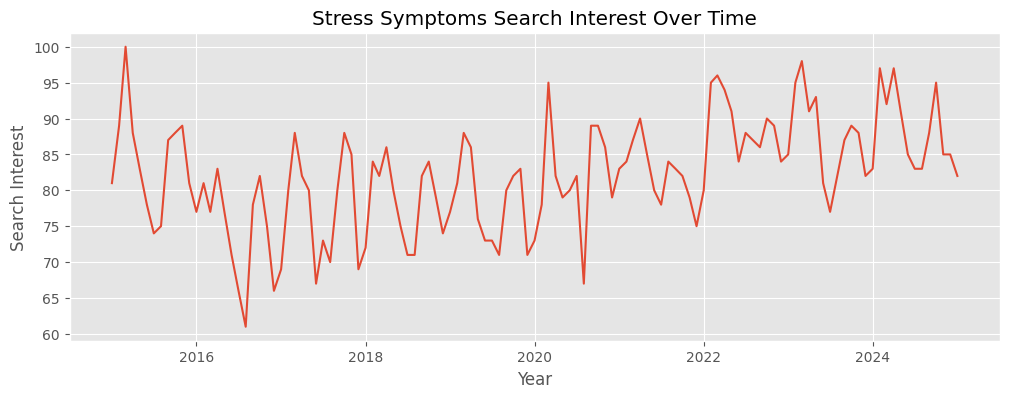

In [ ]:
# How have social media search levels and stress levels changed over time?

plt.figure(figsize=(12,4))
plt.plot(df.index, df['social media use'])
plt.title("Social Media Search Interest Over Time")
plt.xlabel("Year")
plt.ylabel("Search Interest")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df.index, df['stress symptoms'])
plt.title("Stress Symptoms Search Interest Over Time")
plt.xlabel("Year")
plt.ylabel("Search Interest")
plt.show()


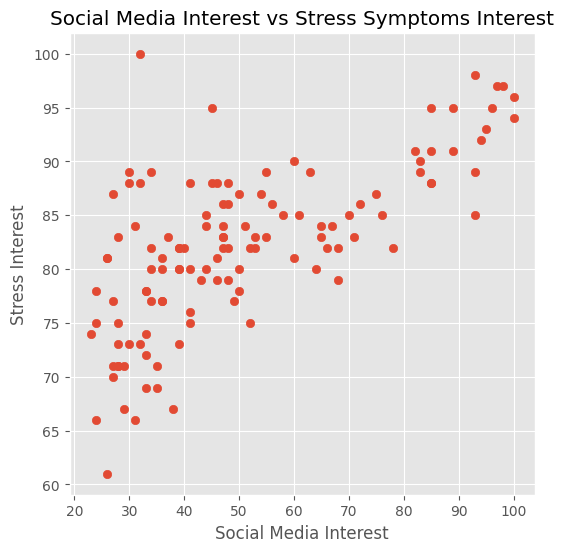

In [ ]:
# Do social media search levels correlate with stress search levels?
plt.figure(figsize=(6,6))
plt.scatter(df['social media use'], df['stress symptoms'])
plt.title("Social Media Interest vs Stress Symptoms Interest")
plt.xlabel("Social Media Interest")
plt.ylabel("Stress Interest")
plt.show()



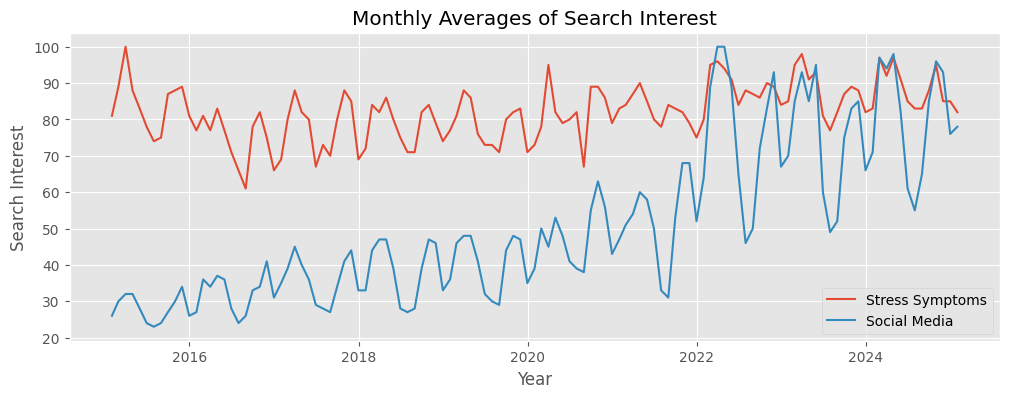

In [15]:
# Are there predictable seasonal patterns? Question that can be answered.

df_monthly = df.resample('ME').mean()

plt.figure(figsize=(12,4))
plt.plot(df_monthly.index, df_monthly['stress symptoms'], label="Stress Symptoms")
plt.plot(df_monthly.index, df_monthly['social media use'], label="Social Media")
plt.title("Monthly Averages of Search Interest Over Time")
plt.xlabel("Year")
plt.ylabel("Search Interest")
plt.legend()
plt.show()


In [9]:
X = df[['social media use']].values
y = df['stress symptoms'].values

model = LinearRegression()
model.fit(X, y)

df['predicted_stress'] = model.predict(X)


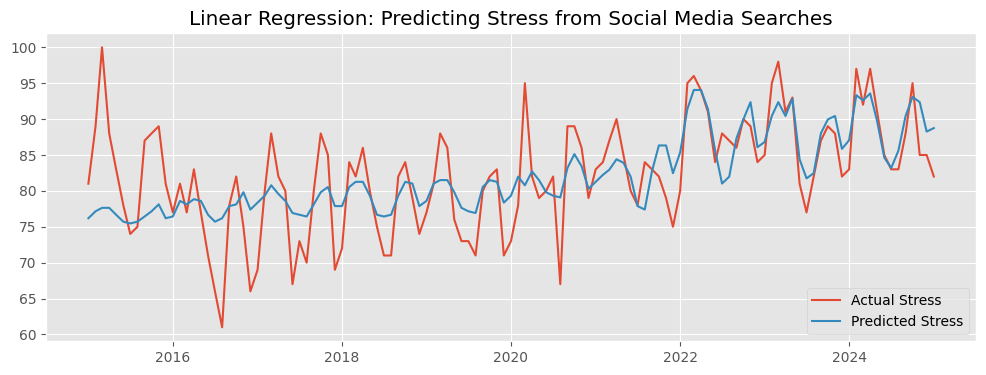

In [10]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['stress symptoms'], label="Actual Stress")
plt.plot(df.index, df['predicted_stress'], label="Predicted Stress")
plt.title("Linear Regression: Predicting Stress from Social Media Searches")
plt.legend()
plt.show()
